# Clustering

In [1]:
%matplotlib inline

In [97]:
from IPython.display import display
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

### Grains

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

seeds = pd.read_csv('dc_seeds.csv', header=None)
seeds[7] = seeds[7].replace(1,'Kama wheat')
seeds[7] = seeds[7].replace(2,'Rosa wheat')
seeds[7] = seeds[7].replace(3,'Canadian wheat')
samples = seeds.drop(7,axis=1).values
varieties = seeds[7].values

How many clusters should we have? Use the "inertia" attribute.

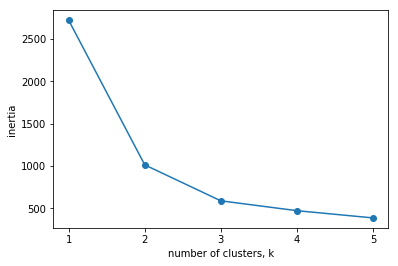

In [34]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [35]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                      68           9           0
2                       2          60          10


### Wine

In [9]:
from urllib.request import urlretrieve
url = 'https://assets.datacamp.com/production/course_2072/datasets/wine.csv'
urlretrieve(url, 'dc_wine_clustering.csv')
wine = pd.read_csv('dc_wine_clustering.csv')

samples = wine.drop(['class_label','class_name'], axis=1).values
varieties = wine.class_name.values

wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
model = KMeans(n_clusters=3)

labels = model.fit_predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'],df['varieties'])

print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


Very poor clustering. KMeans weights the features according to the variance so we need to standardize the features so that features with large variance don't dominate!

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,kmeans)

pipeline.fit(samples)
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'],df['varieties'])

print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          65
1               48       0           3
2                0      59           3


### Fish

In [48]:
url = 'https://assets.datacamp.com/production/course_2072/datasets/fish.csv'
urlretrieve(url,'dc_fish.csv')
fish = pd.read_csv('dc_fish.csv', header=None)

samples = fish.drop(0,axis=1).values
varieties = fish[0].values

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler,kmeans)

pipeline.fit(samples)
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'],df['varieties'])

print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0      55           0
1                0       0          44
2               48       0           1
3                0       4          26


### Stocks

StandardScaler standardizes features by removing the mean and scaling to unit variance.  Normalizer rescales each sample independently

In [10]:
url = 'https://assets.datacamp.com/production/course_2072/datasets/company-stock-movements-2010-2015-incl.csv'
urlretrieve(url, 'dc_stocks_unsuper.csv')
stocks = pd.read_csv('dc_stocks_unsuper.csv', index_col=0)

movements = stocks.values
companies = stocks.index

In [13]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by='labels'))

                             companies  labels
26                      JPMorgan Chase       0
1                                  AIG       0
3                     American express       0
5                      Bank of America       0
55                         Wells Fargo       0
18                       Goldman Sachs       0
16                   General Electrics       0
49                               Total       1
42                   Royal Dutch Shell       1
20                          Home Depot       1
19                     GlaxoSmithKline       1
30                          MasterCard       1
46                      Sanofi-Aventis       1
43                                 SAP       1
52                            Unilever       1
37                            Novartis       1
6             British American Tobacco       1
39                              Pfizer       1
31                           McDonalds       2
38                               Pepsi       2
41           

# Visualization

### Eurovision

Using dendrograms:

In [110]:
url = 'https://assets.datacamp.com/production/course_2072/datasets/eurovision-2016.csv'
urlretrieve(url,'dc_eurovision.csv')
eurovision = pd.read_csv('dc_eurovision.csv')

eurovision = eurovision[['From country','To country', 'Jury Points']]
eurovision = eurovision.pivot(index='From country', columns='To country', values='Jury Points')
eurovision = eurovision.fillna(0)


samples = eurovision.values
country_names = eurovision.index
eurovision.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,Georgia,Germany,Hungary,Israel,Italy,Latvia,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,12.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,3.0,8.0,0.0,0.0,2.0,0.0,7.0,0.0,6.0,0.0,0.0,0.0,5.0
Armenia,0.0,5.0,0.0,0.0,4.0,7.0,0.0,6.0,1.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,12.0,8.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,10.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,2.0,4.0
Austria,2.0,12.0,0.0,0.0,5.0,0.0,6.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.0
Azerbaijan,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,5.0,6.0,2.0,12.0,0.0,1.0,0.0,0.0,10.0,0.0


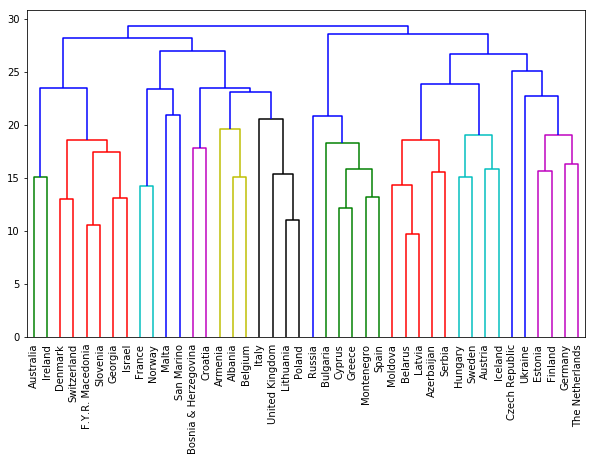

In [113]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=10)
plt.show()

Can use hierarchical clustering for more than just visualization: use height.  This encodes the distance between merging clusters.

Distance between clusters determined by the "method" parameter (complete above).

In [116]:
from scipy.cluster.hierarchy import fcluster

# for a height of 20
labels = fcluster(mergings, 20, criterion='distance')

pairs = pd.DataFrame({'labels': labels, 'countries': country_names})

print(pairs.sort_values('labels'))

               countries  labels
22               Ireland       1
2              Australia       1
38           Switzerland       2
35              Slovenia       2
23                Israel       2
14      F.Y.R. Macedonia       2
12               Denmark       2
17               Georgia       2
16                France       3
30                Norway       3
27                 Malta       4
33            San Marino       5
9                Croatia       6
7   Bosnia & Herzegovina       6
6                Belgium       7
1                Armenia       7
0                Albania       7
26             Lithuania       8
31                Poland       8
41        United Kingdom       8
24                 Italy       9
10                Cyprus      10
36                 Spain      10
29            Montenegro      10
19                Greece      10
8               Bulgaria      10
32                Russia      11
25                Latvia      12
4             Azerbaijan      12
34        

### Grain

Using t-SNE: t-distributed stochastic neighbor embedding

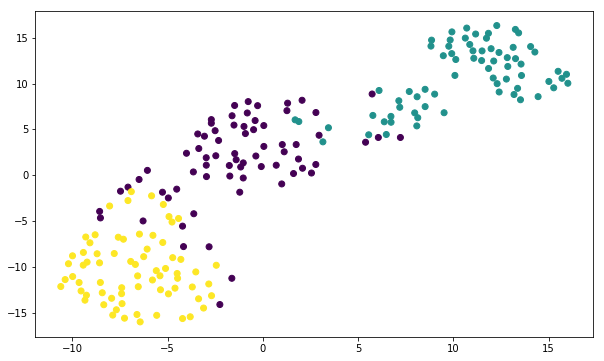

In [119]:
seeds = pd.read_csv('dc_seeds.csv', header=None)
samples = seeds.drop(7,axis=1).values
varieties = seeds[7].values

from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=varieties)
plt.show()

In [21]:
varieties

array(['Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo',
       'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Barolo', 'Grignolino',
       'Grignolino', 'Grignolino', 'Grignolino', 'Grignolino',
       'Grignolino', 'Grignolino', 'Grignolino', 'Grignolino',
       'Grignolino', 'Grignolino', 'Grignolino', 'Grignolino',
       'Grignolino', 'Grignolino', 'Grignolino', 'Grignolino',
       'Grignolino', 'Grignolino', 'Grignolino', 'Grignolino',
       'Gri

### Stocks

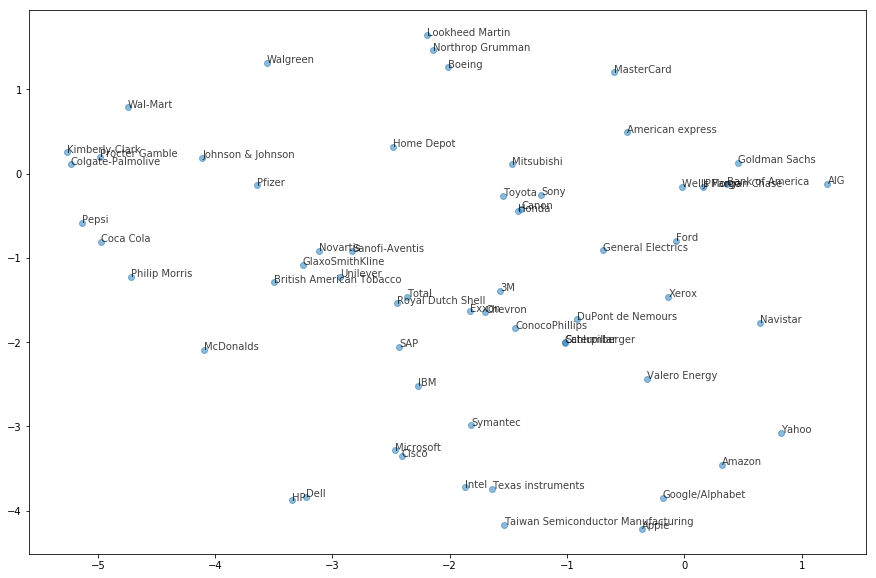

In [18]:
# Import normalize
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE


# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()

# Decorrelating Data and Dimension Reduction

### PCA: Principal Component Analysis

- rotate samples to be aligned with axes
- shift samples to have mean 0
- PCA features are not correlated (even if original features were)

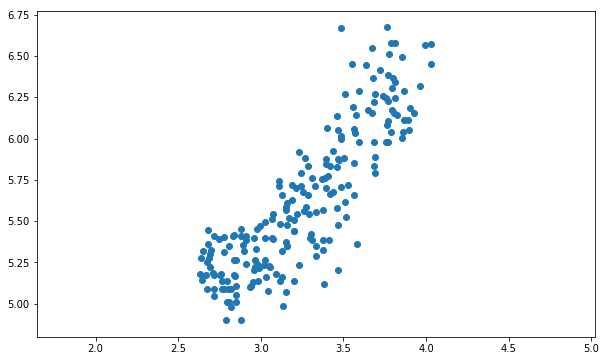

0.8604149377143467


In [138]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = seeds[4].values

# Assign the 1st column of grains: length
length = seeds[3].values

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

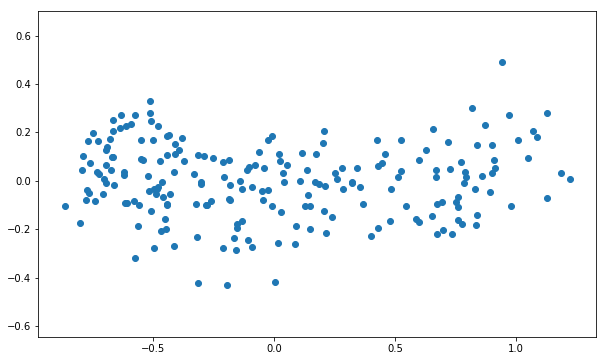

-2.4915522998176803e-17


In [139]:
# Import PCA
from sklearn.decomposition import PCA

df = pd.DataFrame({'width': width, 'length': length})

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(df.values)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

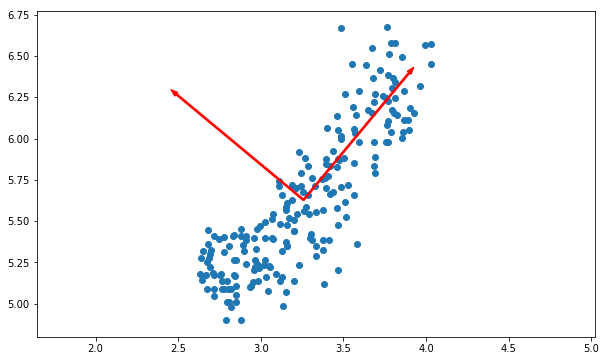

In [145]:
# Make a scatter plot of the untransformed points
plt.scatter(width, length)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(df.values)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[1], mean[0], first_pc[1], first_pc[0], color='red', width=0.01)
plt.arrow(mean[1], mean[0], second_pc[1], second_pc[0], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

The **intrinsic dimension** is the number of PCA features that have significant variance.

### Fish

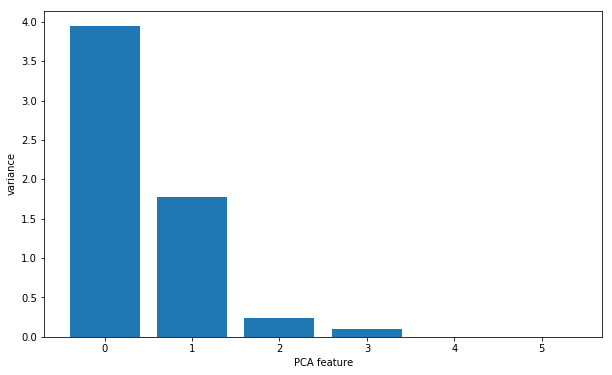

In [144]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

fish = pd.read_csv('dc_fish.csv', header=None)

samples = fish.drop(0,axis=1).values
varieties = fish[0].values

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Use PCA to discard the low-variance features: dimension reduction.

Exception: sparse matrices.  When most of the entries are 0, PCA doesn't support it.  Need to use TruncatedSVD instead.

In [146]:
# Import PCA
from sklearn.decomposition import PCA

scaled_samples = scaler.transform(samples)

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


In [155]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### Wikipedia

In [3]:
from scipy.sparse import csr_matrix
import numpy as np

wiki = pd.read_csv('dc_wikipedia.csv', index_col=0)

articles = np.transpose(csr_matrix(wiki.values))
titles = wiki.columns

In [6]:
wiki.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [7]:
print(articles.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.02960744 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01159441 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00610985 0.         ... 0.         0.00547551 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [199]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

                                          article  label
29                               Jennifer Aniston      0
28                                  Anne Hathaway      0
27                                 Dakota Fanning      0
26                                     Mila Kunis      0
25                                  Russell Crowe      0
24                                   Jessica Biel      0
22                              Denzel Washington      0
21                             Michael Fassbender      0
20                                 Angelina Jolie      0
23                           Catherine Zeta-Jones      0
35                Colombia national football team      1
33                                 Radamel Falcao      1
32                                   Arsenal F.C.      1
31                              Cristiano Ronaldo      1
30                  France national football team      1
36              2014 FIFA World Cup qualification      1
37                             

### NMF: non-negative matrix factorization

- another dimension reduction technique
- interpretable, unlike PCA
- all sample features must be non-negative
- decomposes samples as a sum of parts

In [200]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

In [201]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575714
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422383
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [205]:
print(pd.DataFrame(model.components_).shape)

(6, 13125)


In [215]:
words = pd.read_csv('dc_wikipedia-vocabulary.txt', header=None)

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
(film,)       0.627872
(award,)      0.253130
(starred,)    0.245283
(role,)       0.211450
(actress,)    0.186397
Name: 3, dtype: float64


Using the Cosine Similarity: (.dot())

In [224]:
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### LCD digits

In [221]:
url = 'https://assets.datacamp.com/production/course_2072/datasets/lcd-digits.csv'
urlretrieve(url, 'dc_lcd-digits.csv')
digits = pd.read_csv('dc_lcd-digits.csv', header=None)
samples = np.array(digits)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


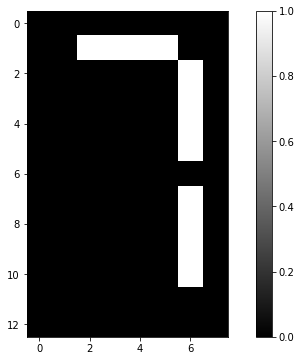

In [222]:
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

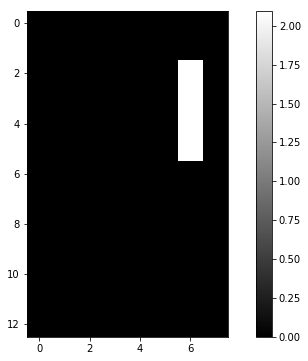

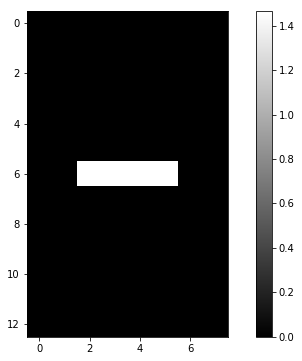

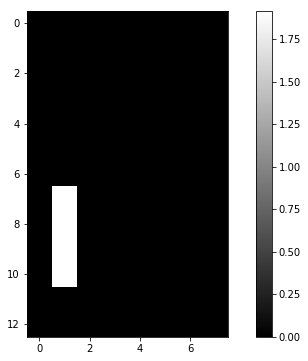

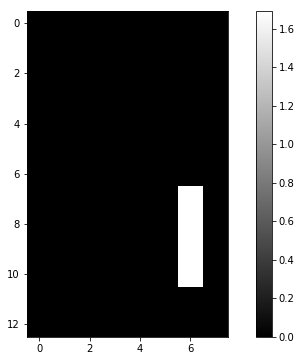

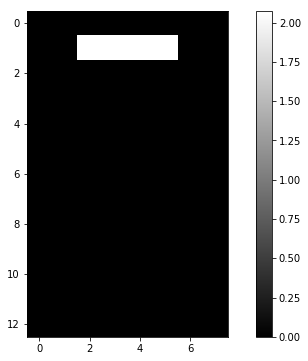

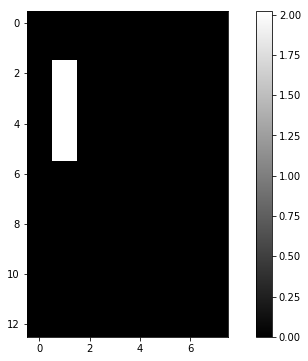

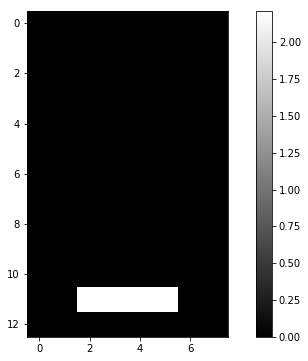

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37551667e-16]


In [223]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

### Musical Artists

In [238]:
artist_list = pd.read_csv('dc_artists.csv', header=None)
artist_names = artist_list.iloc[:,0]

listen_counts = pd.read_csv('dc_scrobbler-small-sample.csv')
listen_counts = listen_counts.pivot(index='artist_offset', columns='user_offset', values='playcount').fillna(0)

artists = csr_matrix(listen_counts.values)

In [240]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

0
Bruce Springsteen    1.000000
Neil Young           0.955949
Van Morrison         0.869637
Bob Dylan            0.856264
Leonard Cohen        0.855174
dtype: float64
